# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for CLT to hold (read CLT carefully), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> Start by computing the margin of error and confidence interval.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What test did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [2]:
import pandas as pd
from IPython.display import HTML, display, Math, Latex
%matplotlib inline

from scipy import stats
import random

import matplotlib
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('data/human_body_temperature.csv')

In [3]:
df.head()

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


In [4]:
df.describe()

,temperature,heart_rate
count,130.000000,130.000000
mean,98.249231,73.761538
std,0.733183,7.062077
min,96.300000,57.000000
25%,97.800000,69.000000
50%,98.300000,74.000000
75%,98.700000,79.000000
max,100.800000,89.000000


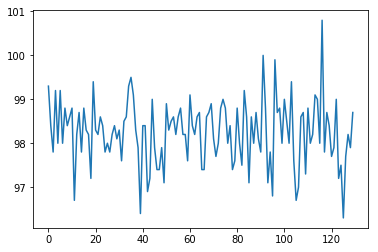

In [5]:
df.temperature.plot()

# 1. Is the distribution of body temperatures normal?

It is difficult to determine whether the temperature data can be considered normally distributed based on the PDF plot. It does not seem symmetric from a purely visual inspection. 

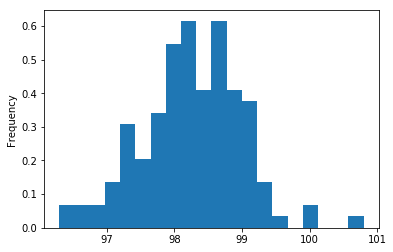

In [6]:
df.temperature.plot(kind='hist', normed=True, bins=20)

A normality test is conducted on the temperature data by generating a quantile-quantile (Q-Q) plot. The linearity of the temperature data in the Q-Q plot suggests that it is normally distributed.

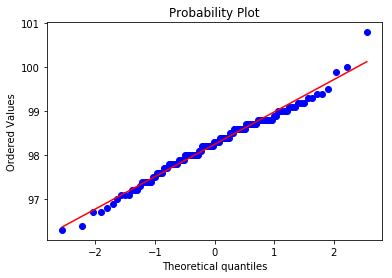

In [7]:
import pylab 
import scipy.stats as stats
  
stats.probplot(df.temperature, dist="norm", plot=pylab)
pylab.show()


# 2. Is the sample size large? Are the observations independent?

Yes the sample size is 130 and the recommended sample size for CLT is n >= 30. The observations are independent since measurements were taken from a random sample of humans.

# 3. Is the true population mean really 98.6 degrees F?

A one-sample should be sufficient since we are only comparing sample mean to a single known population mean.


Although we do have a large sample, a tt-test is preferred for this situation since we do not know the population standard deviation. 

$$\underline {Null Hypothesis}$$
The null hypothesis is that the true population mean is 98.6º F<br>
$$H_0: \mu = 98.6 $$

$$\underline {Alternate Hypothesis}$$
The alternate hypothesis is that the true population mean is <b>not</b> 98.6º F<br>
$$H_1: \mu \ne 98.6 $$

In [8]:
x_bar = df.temperature.mean() #sample mean
mu = 98.6 #population mean
s = df.temperature.std() #sample standard deviation
n = len(df) #number of observations
print(" sample mean: {}\n population mean: {}\n sample standard deviation: {}\n number of observations: {}".format(x_bar, mu, s, n))

 sample mean: 98.24923076923075
 population mean: 98.6
 sample standard deviation: 0.7331831580389456
 number of observations: 130


The t-score is calculated two separate ways below. One using the formula provided <a href= http://www.statisticshowto.com/one-sample-t-test/>here</a> and the other using `scipy.stats.ttest_1samp()` method for one sample. As expected, the t-scores are a match. The p-value is also calculated using `scipy.stats.ttest_1samp` and it is very low, thus we must reject the null hypothesis that the true mean of human body temperature is 98.6º F.

In [9]:
t, p = stats.ttest_1samp(df.temperature, mu)
print('t-score = %6.3f pvalue = %6.4f' % (t,p))

t-score = -5.455 pvalue = 0.0000


When switching to a zz test, the sample standard deviation is used to approximate the population standard deviation to calculate the z-score. CLT tells us we can approximate the population standard deviation using the sample standard deviation and sample size if our sample size is greater than 30. The z-score is almost identical to the t-score. The z-score also results in very low p value and similarly must reject the null hypothesis. 

In [12]:
sigma_approx = s/np.sqrt(n) #approximating population std dev using the sample std dev
z = (df.temperature.mean() - mu)/(sigma_approx)

print("z-score  %6.4f, pvalue = %6.4f" % (z,stats.norm.sf(abs(z))*2))

z-score  -5.4548, pvalue = 0.0000


# 4. Draw a small sample of size 10 from the data and repeat both tests.
The z-test is to be used when sample size is at least 30. After running the t-test and z-test with sample size of 10, it is clear that the z-test provides a lower p value than the t-test. Observations also show that there is a lot of variation of p value from either test depending on the sample. More often than not, however, the p value is high enough that we cannot reject the null hypothesis. 

In [14]:
sample = df.temperature.sample(n=10)

t2, p2= stats.ttest_1samp(sample, mu)
print('t-score = %6.3f pvalue = %6.4f' % (t2,p2))

sigma_approx = sample.std()/np.sqrt(10) #approximating population std dev using the sample std dev
z2 = (sample.mean() - mu)/(sigma_approx)

print("z-score  %6.4f, pvalue = %6.4f" % (z2,stats.norm.sf(abs(z2))*2))

t-score = -3.356 pvalue = 0.0084
z-score  -3.3557, pvalue = 0.0008


# 5. At what temperature should we consider someone's temperature to be "abnormal"?
Any temperature below $98.1^\circ$ F and above $98.4^\circ$ F should be considered abnormal.

In [15]:
z_critical = stats.norm.ppf(q = 0.975) 

margin_of_error = z_critical * (s/np.sqrt(n))

confidence_interval = (x_bar - margin_of_error,
                       x_bar + margin_of_error)  

print("Margin of error = ", margin_of_error)
print("Confidence interval = ",confidence_interval)

Margin of error =  0.126034341049
Confidence interval =  (98.123196428181629, 98.375265110279869)


# 6. Is there a significant difference between males and females in normal temperature?

A two sampled t-test is conducted to determine if there is a difference between body temperatures between males and females. The dataframe is segregated by gender. The null hypothesis is that there is no difference in the average temperature between males and females.

In [16]:
males = df[df.gender == 'M']
females = df[df.gender == 'F']

Text(0.5,1,'CDF of Body Temperature of Males and Females')

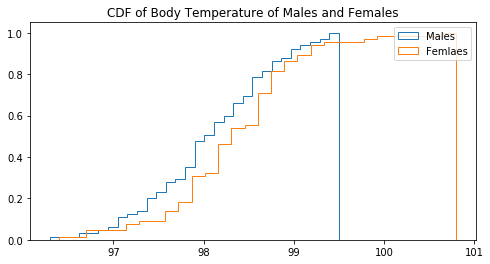

In [42]:
fig, ax = plt.subplots(figsize=(8, 4))
_ = ax.hist(males.temperature, 30, normed=1, histtype='step', cumulative=True, label='Males')
_ = ax.hist(females.temperature, 30, normed=1, histtype='step', cumulative=True, label='Femlaes')
plt.legend()
plt.title("CDF of Body Temperature of Males and Females")

In [ ]:
stats.ttest_ind(males.temperature, females.temperature, equal_var=True)

Visual inspection of the CDF plot of temperature between males and females show a difference in the distribution of temperature between genders. Based on the two tailed p-value obtained from the two sample t-test, the null hypothesis can be rejected if a threshold of 5% is chosen.